Banknote Dataset은 사진에서 취한 여러 조치를 통해 주어진 지폐가 진품인지 예측하는 것

데이터셋 준비

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
Banknote_Dataset = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt', sep=',')

In [ ]:
Banknote_Dataset

,3.6216,8.6661,-2.8073,-0.44699,0
0,4.54590,8.16740,-2.4586,-1.46210,0
1,3.86600,-2.63830,1.9242,0.10645,0
2,3.45660,9.52280,-4.0112,-3.59440,0
3,0.32924,-4.45520,4.5718,-0.98880,0
4,4.36840,9.67180,-3.9606,-3.16250,0
...,...,...,...,...,...
1366,0.40614,1.34920,-1.4501,-0.55949,1
1367,-1.38870,-4.87730,6.4774,0.34179,1
1368,-3.75030,-13.45860,17.5932,-2.77710,1
1369,-3.56370,-8.38270,12.3930,-1.28230,1


- Wavelet 변환 이미지의 분산(연속).
- 웨이블릿 변환 이미지의 왜곡도(연속).
- Wavelet 변환 이미지의 첨도(연속).
- 이미지의 엔트로피(연속).
- 등급(0은 정품, 1은 정품이 아님).

In [ ]:
new_columns = ['Variance','Skewness', 'Kurtosis', 'Entropy', 'Class']
new_data = [3.6216,	8.6661,	-2.8073,	-0.44699,	0]

Banknote_Dataset = Banknote_Dataset.shift(1)
Banknote_Dataset.columns = new_columns
Banknote_Dataset.loc[0] = new_data
Banknote_Dataset

,Variance,Skewness,Kurtosis,Entropy,Class
0,3.62160,8.6661,-2.80730,-0.44699,0.0
1,4.54590,8.1674,-2.45860,-1.46210,0.0
2,3.86600,-2.6383,1.92420,0.10645,0.0
3,3.45660,9.5228,-4.01120,-3.59440,0.0
4,0.32924,-4.4552,4.57180,-0.98880,0.0
...,...,...,...,...,...
1366,-2.41000,3.7433,-0.40215,-1.29530,1.0
1367,0.40614,1.3492,-1.45010,-0.55949,1.0
1368,-1.38870,-4.8773,6.47740,0.34179,1.0
1369,-3.75030,-13.4586,17.59320,-2.77710,1.0


In [ ]:
Banknote_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371 entries, 0 to 1370
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1371 non-null   float64
 1   Skewness  1371 non-null   float64
 2   Kurtosis  1371 non-null   float64
 3   Entropy   1371 non-null   float64
 4   Class     1371 non-null   float64
dtypes: float64(5)
memory usage: 53.7 KB


이진(2등급) 분류 문제. 각 클래스에 대한 관측치 수가 균형을 이루지 않는다.

4개의 입력 변수와 1개의 출력 변수가 있는 1,371개의 관측치가 있다.

데이터 전처리

array([[<Axes: title={'center': 'Variance'}>,
        <Axes: title={'center': 'Skewness'}>],
       [<Axes: title={'center': 'Kurtosis'}>,
        <Axes: title={'center': 'Entropy'}>],
       [<Axes: title={'center': 'Class'}>, <Axes: >]], dtype=object)

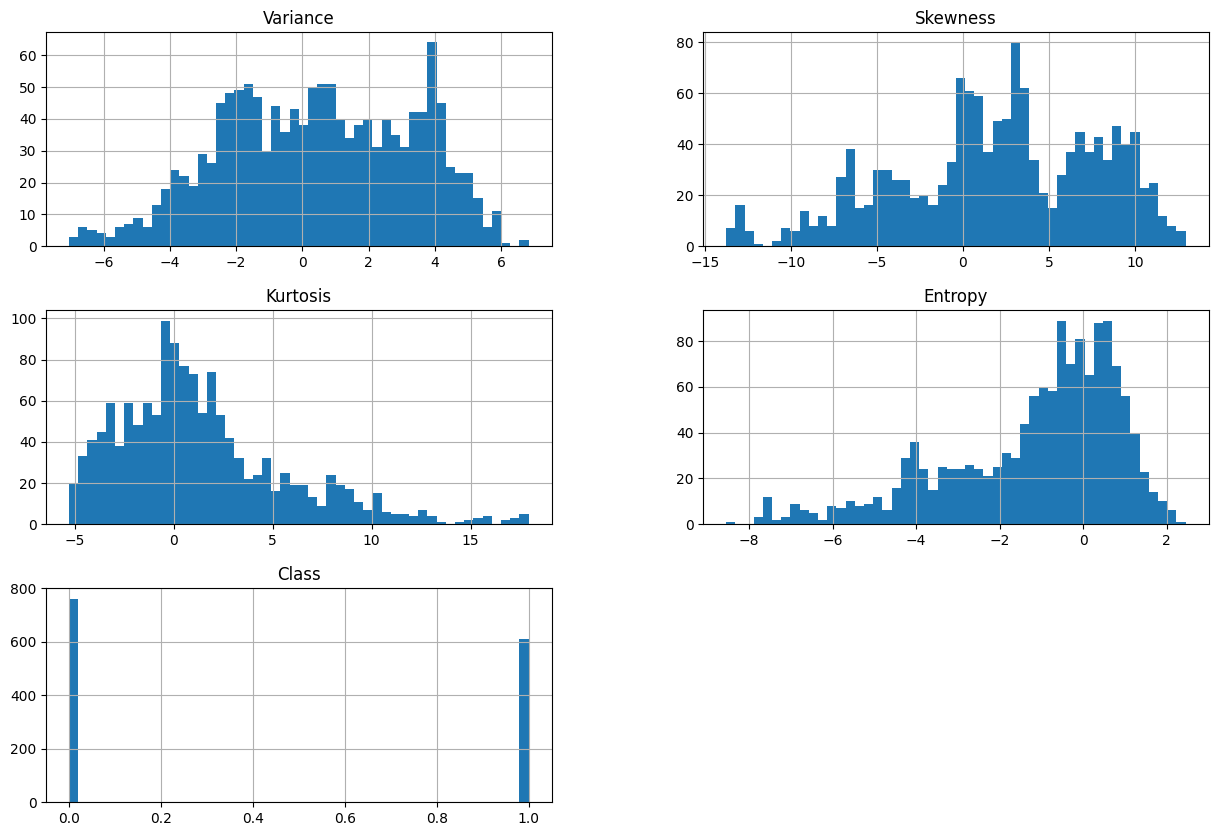

In [ ]:
Banknote_Dataset.hist(bins=50,figsize=(15,10))

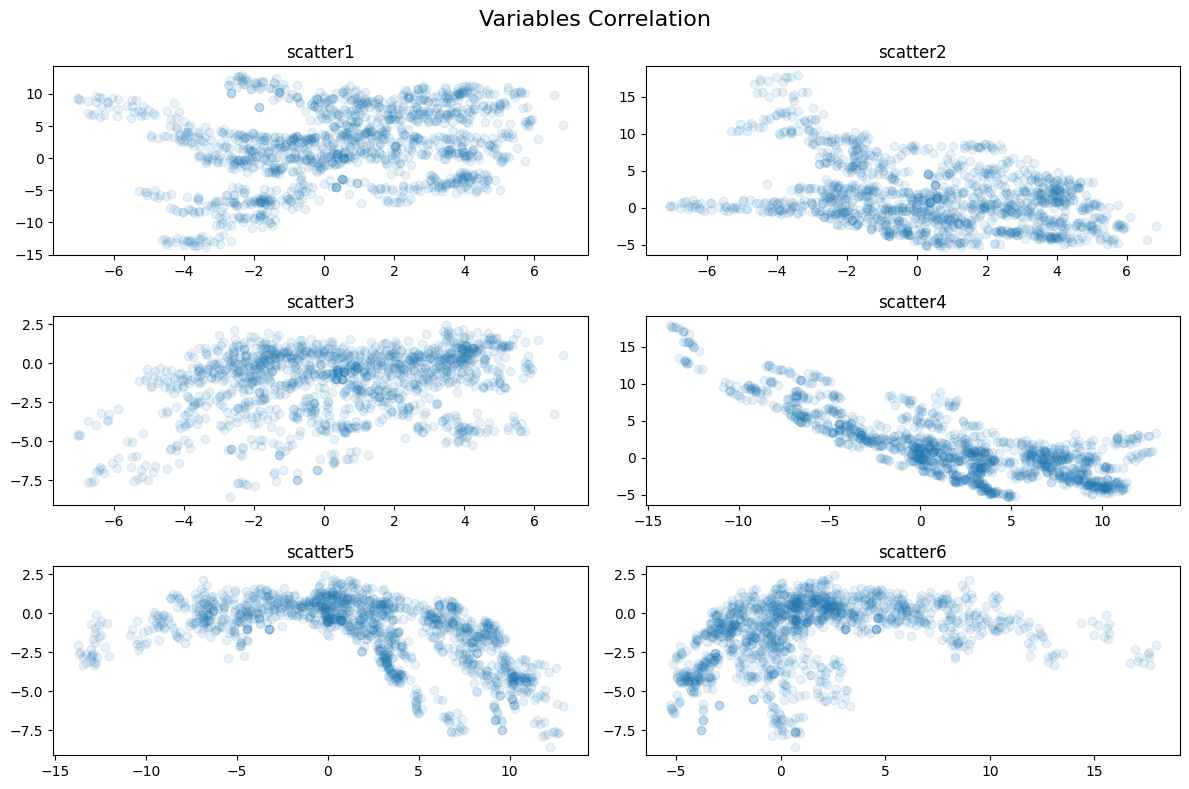

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
'Variance','Skewness', 'Kurtosis', 'Entropy'

axes[0, 0].scatter(x=Banknote_Dataset['Variance'], y=Banknote_Dataset['Skewness'], alpha=0.1)
axes[0, 0].set_title('scatter1')

axes[0, 1].scatter(x=Banknote_Dataset['Variance'], y=Banknote_Dataset['Kurtosis'], alpha=0.1)
axes[0, 1].set_title('scatter2')

axes[1, 0].scatter(x=Banknote_Dataset['Variance'], y=Banknote_Dataset['Entropy'], alpha=0.1)
axes[1, 0].set_title('scatter3')

axes[1, 1].scatter(x=Banknote_Dataset['Skewness'], y=Banknote_Dataset['Kurtosis'], alpha=0.1)
axes[1, 1].set_title('scatter4')

axes[2, 0].scatter(x=Banknote_Dataset['Skewness'], y=Banknote_Dataset['Entropy'], alpha=0.1)
axes[2, 0].set_title('scatter5')

axes[2, 1].scatter(x=Banknote_Dataset['Kurtosis'], y=Banknote_Dataset['Entropy'], alpha=0.1)
axes[2, 1].set_title('scatter6')

# 전체 그래프 제목 설정
fig.suptitle('Variables Correlation', size=16)

# 그래프 간 간격 조정
plt.tight_layout()

# 그래프 표시
plt.show()

In [ ]:
inputs = Banknote_Dataset.drop(columns=['Class'])
targets = Banknote_Dataset['Class'].astype(int)
targets

0       0
1       0
2       0
3       0
4       0
       ..
1366    1
1367    1
1368    1
1369    1
1370    1
Name: Class, Length: 1371, dtype: int64

In [ ]:
# 이진 분류이니까
encoded_targets = pd.get_dummies(targets)
encoded_targets

,0,1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1366,0,1
1367,0,1
1368,0,1
1369,0,1


In [ ]:
new_target = ['No_genuine', 'genuine']
encoded_targets.columns = new_target
encoded_targets

,No_genuine,genuine
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1366,0,1
1367,0,1
1368,0,1
1369,0,1


In [ ]:
# training set, test set 나누기
from sklearn.model_selection import train_test_split
(inputs_train,inputs_test,targets_train, targets_test) = train_test_split(inputs, encoded_targets,test_size=0.2)

train 값 설정

In [ ]:
inputs_train

,Variance,Skewness,Kurtosis,Entropy
630,2.59890,3.5178,0.76230,0.811190
462,4.93620,7.6046,-2.34290,-0.853020
1077,-1.60010,-9.5828,9.40440,0.081882
662,2.97360,8.7944,-3.63590,-1.375400
750,4.04220,-4.3910,4.74660,1.137000
...,...,...,...,...
124,-0.91718,9.9884,1.18040,-5.226300
273,2.69460,6.7976,-0.40301,0.449120
673,-1.83480,11.0334,3.18630,-4.888800
1010,-2.99150,-6.6258,8.65210,1.819800


In [ ]:
targets_train

,No_genuine,genuine
630,1,0
462,1,0
1077,0,1
662,1,0
750,1,0
...,...,...
124,1,0
273,1,0
673,1,0
1010,0,1


2차 모델링

In [ ]:
class Model(tf.keras.Model):
  def __init__(self):
    super(Model,self).__init__()
    initializer = tf.keras.initializers.glorot_uniform()
    self.b1 = tf.Variable(initializer([10]))
    self.w1 = tf.Variable(initializer([4,10]))
    self.b2 = tf.Variable(initializer([2]))
    self.w2 = tf.Variable(initializer([10,2]))
    

  def call(self,inputs):
    y = self.b1 + inputs @ self.w1
    y = tf.keras.activations.sigmoid(y)
    y = self.b2 + y @ self.w2
    y = tf.keras.activations.softmax(y)
    return tf.squeeze(y)

def loss(target, y):
  return tf.reduce_mean((tf.constant(target, dtype=tf.float32)-y)**2)

학습률 설정

In [ ]:
lr = 0.05
opt = tf.keras.optimizers.SGD(learning_rate=lr)
model = Model()
model.compile(optimizer=opt,loss = 'binary_crossentropy')
history = model.fit(inputs_train, targets_train, epochs=100, batch_size=25)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


44/44 [==============================] - 1s 2ms/step - loss: 0.7689
Epoch 2/100
44/44 [==============================] - 0s 2ms/step - loss: 0.5564
Epoch 3/100
44/44 [==============================] - 0s 2ms/step - loss: 0.4296
Epoch 4/100
44/44 [==============================] - 0s 2ms/step - loss: 0.3232
Epoch 5/100
44/44 [==============================] - 0s 2ms/step - loss: 0.2475
Epoch 6/100
44/44 [==============================] - 0s 2ms/step - loss: 0.1974
Epoch 7/100
44/44 [==============================] - 0s 2ms/step - loss: 0.1635
Epoch 8/100
44/44 [==============================] - 0s 2ms/step - loss: 0.1392
Epoch 9/100
44/44 [==============================] - 0s 2ms/step - loss: 0.1214
Epoch 10/100
44/44 [==============================] - 0s 2ms/step - loss: 0.1077
Epoch 11/100
44/44 [==============================] - 0s 2ms/step - loss: 0.0968
Epoch 12/100
44/44 [==============================] - 0s 2ms/step - loss: 0.0879
Epoch 13/100
44/44 [=============================

loss 값 변화율
```



<Axes: >

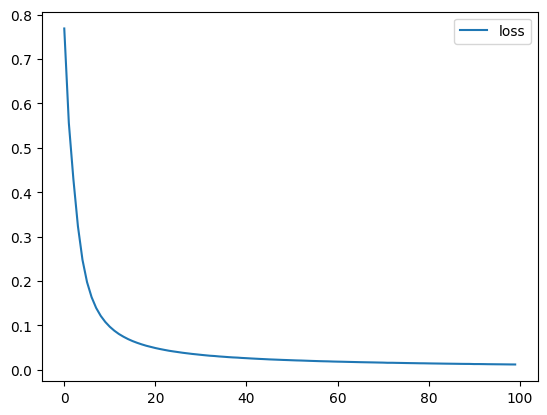

In [ ]:
pd.DataFrame(history.history).plot()